# Kaggle test
***
## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Read in Train and Test

In [2]:
train = pd.read_csv('../data/train.csv')

In [3]:
test = pd.read_csv('../data/test.csv')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Data columns (total 8 columns):
Id                17040 non-null int64
Province/State    7800 non-null object
Country/Region    17040 non-null object
Lat               17040 non-null float64
Long              17040 non-null float64
Date              17040 non-null object
ConfirmedCases    17040 non-null float64
Fatalities        17040 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 6 columns):
ForecastId        12212 non-null int64
Province/State    5590 non-null object
Country/Region    12212 non-null object
Lat               12212 non-null float64
Long              12212 non-null float64
Date              12212 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 572.6+ KB


## Concatenate Data Frames

In [26]:
frames = [train, test]
cov_test = pd.concat(frames, join='outer', sort=True)

In [27]:
cov_test

,ConfirmedCases,Country/Region,Date,Fatalities,ForecastId,Id,Lat,Long,Province/State
0,0.0,Afghanistan,2020-01-22,0.0,NaN,1.0,33.0000,65.0000,NaN
1,0.0,Afghanistan,2020-01-23,0.0,NaN,2.0,33.0000,65.0000,NaN
2,0.0,Afghanistan,2020-01-24,0.0,NaN,3.0,33.0000,65.0000,NaN
3,0.0,Afghanistan,2020-01-25,0.0,NaN,4.0,33.0000,65.0000,NaN
4,0.0,Afghanistan,2020-01-26,0.0,NaN,5.0,33.0000,65.0000,NaN
...,...,...,...,...,...,...,...,...,...
12207,NaN,Zambia,2020-04-19,NaN,12208.0,NaN,-15.4167,28.2833,NaN
12208,NaN,Zambia,2020-04-20,NaN,12209.0,NaN,-15.4167,28.2833,NaN
12209,NaN,Zambia,2020-04-21,NaN,12210.0,NaN,-15.4167,28.2833,NaN
12210,NaN,Zambia,2020-04-22,NaN,12211.0,NaN,-15.4167,28.2833,NaN


## Set Date as index

In [28]:
cov_test.set_index('Date', inplace=True)
cov_test.sort_index(inplace=True)

In [29]:
cov_test.loc[['2020-03-12']]

,ConfirmedCases,Country/Region,Fatalities,ForecastId,Id,Lat,Long,Province/State
Date,,,,,,,,
2020-03-12,NaN,Estonia,NaN,4172.0,NaN,58.5953,25.0136,NaN
2020-03-12,NaN,Netherlands,NaN,7182.0,NaN,52.1326,5.2913,Netherlands
2020-03-12,NaN,New Zealand,NaN,7225.0,NaN,-40.9006,174.8860,NaN
2020-03-12,NaN,Canada,NaN,1893.0,NaN,52.9399,-106.4509,Saskatchewan
2020-03-12,NaN,Netherlands,NaN,7139.0,NaN,12.1696,-68.9900,Curacao
...,...,...,...,...,...,...,...,...
2020-03-12,59.0,Portugal,0.0,NaN,16698.0,39.3999,-8.2245,NaN
2020-03-12,2.0,Honduras,0.0,NaN,11583.0,15.2000,-86.2419,NaN
2020-03-12,0.0,Jersey,0.0,NaN,12699.0,49.1900,-2.1100,NaN


## Groupby Date and Confirmed Cases

In [30]:
cov_confirmed = cov_test.groupby('Date')[['ConfirmedCases']].sum()

In [32]:
cov_confirmed

,ConfirmedCases
Date,
2020-01-22,554.0
2020-01-23,652.0
2020-01-24,939.0
2020-01-25,1432.0
2020-01-26,2113.0
...,...
2020-04-19,0.0
2020-04-20,0.0
2020-04-21,0.0


## Set Rolling Mean to 3

In [33]:
cov_confirmed.rolling(3).mean()

,ConfirmedCases
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,715.000000
2020-01-25,1007.666667
2020-01-26,1494.666667
...,...
2020-04-19,0.000000
2020-04-20,0.000000
2020-04-21,0.000000


## Create Lag Columns

In [272]:
# Create a column called `lag_1` that lags Confirmed Cases by 1 day
cov_confirmed['lag_1'] = cov_confirmed['ConfirmedCases'].shift(1)

# Create a column called `lag_2` that lags Confirmed Cases by 2 days.
cov_confirmed['lag_2'] = cov_confirmed['ConfirmedCases'].shift(2)

# Create a column called `seasonal_12` that lags Confirmed Cases by 14 days.
cov_confirmed['lag_4'] = cov_confirmed['ConfirmedCases'].shift(33)

# Create a variable called `time` that takes on a value of 0 on January 22nd 2020,
# then increases by 1 each day until the end of the dataframe.
cov_confirmed['time'] = range(0, cov_confirmed.shape[0])

In [273]:
cov_confirmed.head()

,ConfirmedCases,lag_1,lag_2,lag_4,time
Date,,,,,
2020-01-22,554.0,NaN,NaN,NaN,0
2020-01-23,652.0,554.0,NaN,NaN,1
2020-01-24,939.0,652.0,554.0,NaN,2
2020-01-25,1432.0,939.0,652.0,NaN,3
2020-01-26,2113.0,1432.0,939.0,NaN,4


In [274]:
cov_confirmed.tail()

,ConfirmedCases,lag_1,lag_2,lag_4,time
Date,,,,,
2020-04-19,0.0,0.0,0.0,197140.0,88
2020-04-20,0.0,0.0,0.0,214908.0,89
2020-04-21,0.0,0.0,0.0,242695.0,90
2020-04-22,0.0,0.0,0.0,272141.0,91
2020-04-23,0.0,0.0,0.0,304483.0,92


## Create a Model by Generating train/test split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(cov_confirmed.drop(columns='ConfirmedCases'),
                                                    cov_confirmed['ConfirmedCases'],
                                                    test_size = 0.33,
                                                    shuffle = False)

In [342]:
# Check shape to confirm this was done properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62, 4)
(31, 4)
(62,)
(31,)


In [343]:
# Import statsmodels.
import statsmodels.api as sm

## Create an intercept as a column entitled "constant"

In [344]:
# Create intercept

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Confirm.
X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,lag_1,lag_2,lag_4,time
Date,,,,,
2020-01-22,1.0,NaN,NaN,NaN,0
2020-01-23,1.0,554.0,NaN,NaN,1
2020-01-24,1.0,652.0,554.0,NaN,2
2020-01-25,1.0,939.0,652.0,NaN,3
2020-01-26,1.0,1432.0,939.0,NaN,4


## Drop the missing values

In [345]:
# statsmodels won't be able to handle missing values.

X_train.dropna(inplace = True)
y_train = y_train[X_train.index]

# This way we subset y_train to keep only indices from X_train.

## Instantiate Model

In [346]:
# In statsmodels, we pass our data in when we instantiate the model!

lm = sm.OLS(y_train, X_train)

## Fit model

In [347]:
# Fit the model.
lm_results = lm.fit()

## Display statsmodels summary

In [348]:
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:         ConfirmedCases   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     10.03
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           6.45e-05
Time:                        23:22:42   Log-Likelihood:                -349.82
No. Observations:                  29   AIC:                             709.6
Df Residuals:                      24   BIC:                             716.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.24e+05   2.14e+05      1.984      0.0

## Generate predicted values

In [349]:
# Generate predicted test values.
lm_results.predict(X_test)

Date
2020-03-24    4.688143e+05
2020-03-25    4.656954e+05
2020-03-26    4.697677e+05
2020-03-27    4.651368e+05
2020-03-28    4.618845e+05
2020-03-29    4.601695e+05
2020-03-30    4.593248e+05
2020-03-31    4.608688e+05
2020-04-01    4.624636e+05
2020-04-02    4.673428e+05
2020-04-03    4.752014e+05
2020-04-04    4.802775e+05
2020-04-05    4.891653e+05
2020-04-06    4.963696e+05
2020-04-07    5.064008e+05
2020-04-08    5.238203e+05
2020-04-09    5.416274e+05
2020-04-10    5.590533e+05
2020-04-11    5.754818e+05
2020-04-12    6.036438e+05
2020-04-13    6.427644e+05
2020-04-14    6.514235e+05
2020-04-15    7.513844e+05
2020-04-16    8.135528e+05
2020-04-17    8.785863e+05
2020-04-18    9.609438e+05
2020-04-19    1.053059e+06
2020-04-20    1.158852e+06
2020-04-21    1.328293e+06
2020-04-22    1.508273e+06
2020-04-23    1.706651e+06
dtype: float64

In [353]:
# Import R2 score and MSE.
from sklearn.metrics import r2_score, mean_squared_error

In [354]:
print(f'R2: {r2_score(y_test, lm_results.predict(X_test))}')
print(f'RMSE: {mean_squared_error(y_test, lm_results.predict(X_test)) ** 0.5}')

R2: 0.0
RMSE: 763944.4259819454


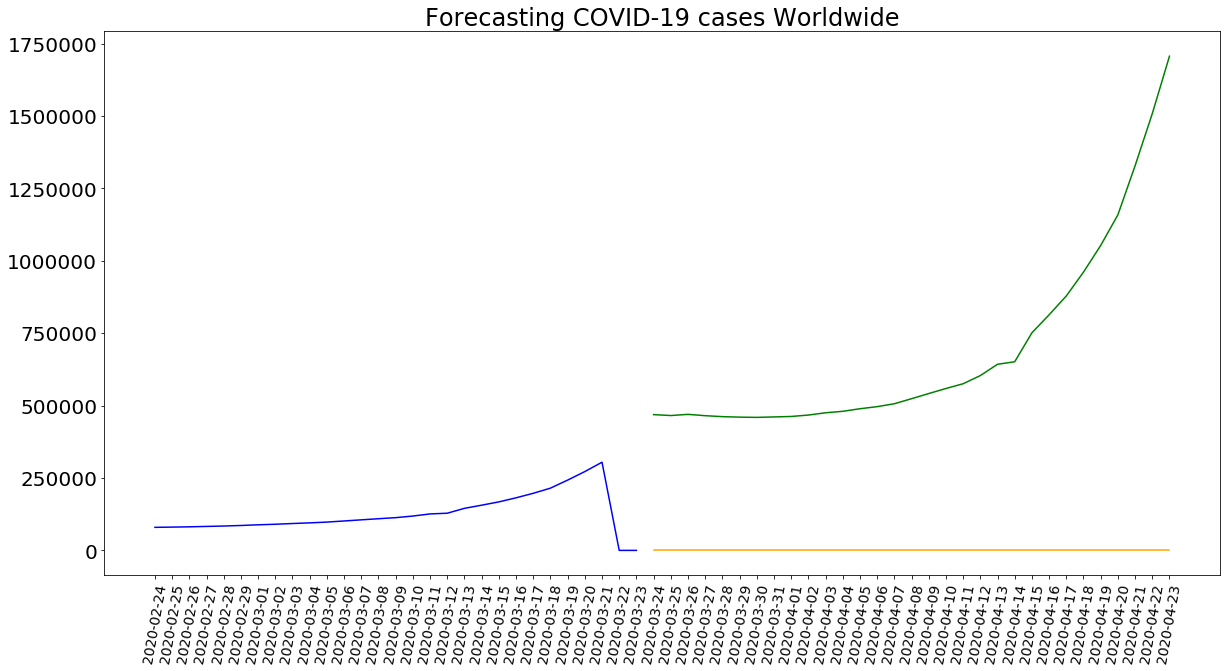

In [355]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Forecasting COVID-19 cases Worldwide', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=14, rotation=80)
plt.yticks(fontsize=20);